# **Chapter 1**

## **01. 데이터를 읽어들이자**

In [1]:
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [2]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [5]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [6]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


먼저 데이터 전체를 파악하기 위해, 되도록 **상세하게 나와 있는 쪽에 맞추어** 데이터를 가공하는 것이 중요하다.

transaction_detail을 기준으로, 필요한 2가지의 데이터 가공:
1. transaction_detail_1과 transaction_detail_2 그리고 transcaction_1과 transaction_2를 **세로로** 결합(**union**)하기
2. transaction_detail을 기준으로, transaction, customer_master, item_master를 **가로로** 결합(**join**)하기

## **02. 데이터를 결합(union)해보자**

In [7]:
# transaction 데이터 결합(union)
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [8]:
# 유니언됐는지 검증
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction_1)+len(transaction_2))
print(len(transaction))

5000
1786
6786
6786


In [9]:
# transaction_detail 세로 방향 결합(union)
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


## **03. 매출 데이터끼리 결합(join)해보자**

In [10]:
# 공통 데이터 column은 transaction_id

# 가로 방향 결합(join)
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [11]:
# 데이터 개수 검증
print(len(transaction_detail))
print(len(transaction))
print(len(transaction_detail)+len(transaction))
print(len(join_data))

7144
6786
13930
7144


len(transaction_detail) = len(join_data)

세로로 데이터가 늘어나지 않고 **가로로 데이터가 늘어가서 join된 것**을 확인

## **04. 마스터데이터를 결합(join)해보자**

In [12]:
# 각각의 id를 기준으로 결합
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [13]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [14]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


## **05. 필요한 데이터 칼럼을 만들자**

In [15]:
# 매출(price) 행 추가
join_data["price"] = join_data["quantity"]*join_data["item_price"]
join_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## **06. 데이터를 검산하자**

In [16]:
# 데이터 가공 전 transaction의 price 총합 ?= 데이터 가공 후 게산한 price의 총합
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [17]:
join_data["price"].sum() == transaction["price"].sum()

True

## **07. 각종 통계량을 파악하자**

데이터 분석을 진행할 때 파악해야하는 두 가지 숫자:

1. 결손치의 개수
2. 전체를 파악할 수 있는 숫자감

In [18]:
# 결손치의 개수 출력
join_data.isnull().sum()

,0
detail_id,0
transaction_id,0
item_id,0
quantity,0
payment_date,0
customer_id,0
customer_name,0
registration_date,0
email,0
gender,0


`isnull()`을 이용하면 결손치가 `True`/`False`로 반환되기 때문에 `True`의 개수를 column마다 `sum()`으로 계산한다.

In [19]:
# 각종 통계량 출력: 전체적인 느낌을 파악하기 위함
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


`describe()`는 숫자 데이털를 집계한다.

In [20]:
# 데이터의 기간 확인
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


## **08. 월별로 데이터를 집계해보자**

전체적인 분위기 파악 → 시계열 상황 살펴보기

과거 수년의 데이터에는 여러가지 비즈니스 모델이 포함되어 있을 수 있기 때문에, 전체 데이터를 한 번에 분석하면 데이터의 시계열 변화를 잘못 파악하는 경우가 있다.

→ **데이터 범위를 좁혀서 분석하자!**

In [21]:
# 데이터형 확인
join_data.dtypes

,0
detail_id,int64
transaction_id,object
item_id,object
quantity,int64
payment_date,object
customer_id,object
customer_name,object
registration_date,object
email,object
gender,object


In [22]:
# 연월을 추출해서 새롭게 칼럼 작성

# datetime형으로 변환
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
# 새로운 column을 연월 단위로 작성 → pandas의 datatime의 dt를 사용하여 년, 월을 추출 → strftime을 이용해 연월 작성
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y-%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019-02
1,2019-02-01 01:37:23,2019-02
2,2019-02-01 02:34:19,2019-02
3,2019-02-01 02:47:23,2019-02
4,2019-02-01 04:33:46,2019-02


In [23]:
# 연월 단위로 price 집계해서 표시
join_data.groupby("payment_month")["price"].sum()

,price
payment_month,
2019-02,160185000
2019-03,160370000
2019-04,160510000
2019-05,155420000
2019-06,164030000
2019-07,170620000


`groupby()`는 집계하고 싶은 column과 집계 방법을 기술한다.

## **09. 월별, 상품별로 데이터를 집계해보자**

In [24]:
join_data.groupby(["payment_month", "item_name"])[["price", "quantity"]].sum()

price  quantity
payment_month item_name                    
2019-02       PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
2019-03       PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
2019-04       PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
2019-05       PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
2019-06       PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
2019-07       PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [25]:
# pivot_table을 이용해 직관적으로 결과 확인
pd.pivot_table(join_data, index="item_name", columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                          
payment_month  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                       
PC-A               483     520     518     497     520     505  
PC-B               297     300     276     298     282     332  
PC-C               165     159     183     171     182     162  
PC-D               173     143     135     144     160     145  
PC-E               285     305     309     280     302     341

`pivot_table`은 행과 칼럼 지정 가능.
*   index : 행
*   columns : 열(칼럼)
*   values : 집계하고 싶은 column
*   aggfunc : 집계 방법을 지정



## **10. 상품별 매출 추이를 가시화해보자**

In [26]:
graph_data = pd.pivot_table(join_data, index="payment_month", columns="item_name", values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000


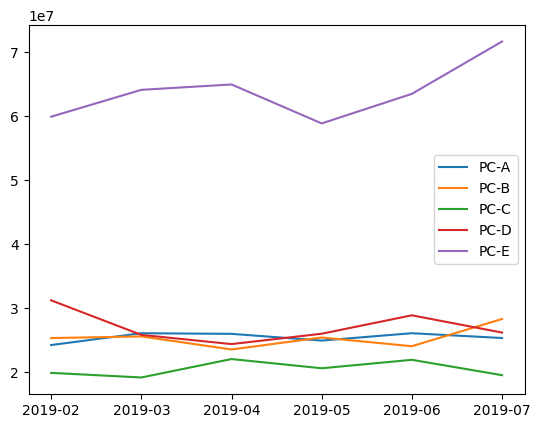

In [27]:
# 월별 및 상품별 매출 추이를 그래프로 그려보기
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()
plt.show()

`PC-E`가 매출을 견인하는 기종이라는 점과 매출 추이를 파악 가능

# **Chapter 2**

## **11. 데이터를 읽어들이자**

In [28]:
uriage_data = pd.read_csv('uriage.csv')
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [29]:
kokyaku_data = pd.read_excel('kokyaku_daicho.xlsx')
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


데이터에 나타나는 입력 오류나 표기 방법의 차이가 부정합을 일으킬 때 **데이터의 정합성에 문제가 있다**라고 한다.

입력된 형식이 다를 때. ex. "상 품 A", "상품 A", "상품A"

같은 날짜나 이름이 포맷이나 입력 오류 등으로 인해 다른 데이터가 되어버리는 것.

## **12. 데이터의 오류를 살펴보자**

In [30]:
# 매출 이력에서 item_name을 추출해서 데이터의 오류 확인
uriage_data["item_name"].head()

,item_name
0,상품A
1,상 품 S
2,상 품 a
3,상품Z
4,상품a


In [31]:
uriage_data['item_price'].head()

,item_price
0,100.0
1,NaN
2,NaN
3,2600.0
4,NaN


`NaN`는 결측치를 의미한다.

In [32]:
# 결측치 확인
uriage_data.isnull().sum()

,0
purchase_date,0
item_name,0
item_price,387
customer_name,0


## **13. 데이터에 오류가 있는 상태로 집계해보자**

데이터의 오류가 어느 정도 집계에 영향을 미치는지 확인함으로써 데이터의 정합성이 얼마나 중요한지 알 수 있다.

In [33]:
uriage_data["purchase_data"] = pd.to_datetime(uriage_data['purchase_date'])
uriage_data["purchase_month"] = uriage_data['purchase_data'].dt.strftime("%Y-%m")
res = uriage_data.pivot_table(index='purchase_month', columns='item_name', aggfunc='size', fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019-01,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2019-02,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2019-03,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2019-05,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2019-06,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2019-07,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


세로축에 구입 연월, 가로축에 상품의 건수로 집계.

데이터의 오류를 수정하지 않고 집계를 진행하였고, 결과를 보면 column이 너무 많아 일부 생략됐지만 '상품S'나 '상품s'처럼 원래 동일한 상품이 다른 상품으로 집계된 것을 확인 가능.

월래 26개의 상품이 데이터의 오류가 있기 때문에 99개로 늘어남.

In [34]:
# 가로축에 item_price를 설정해서 집계
res = uriage_data.pivot_table(index='purchase_month', columns='item_name',
                               values='item_price', aggfunc='sum', fill_value=0)
# 데이터 오류 수정 전 집계 결과(금액) 출력
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019-01,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1100.0,1200.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1900.0,2000.0,2200.0,0.0,0.0
2019-03,0.0,500.0,1300.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2300.0,0.0,1700.0,...,0.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0
2019-05,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0
2019-06,0.0,0.0,0.0,0.0,0.0,2300.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,2400.0,0.0
2019-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1500.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0


## **14. 상품명 오류를 수정하자**

In [35]:
# 상품명의 유니크 수 확인
print(len(pd.unique(uriage_data.item_name)))

99


매출 이력의 item_name의 중복을 제외한 데이터 건수를 `pd.unique`로 확인

In [36]:
uriage_data['item_name'] = uriage_data['item_name'].str.upper()
uriage_data['item_name'] = uriage_data['item_name'].str.replace("  ", "")
uriage_data['item_name'] = uriage_data['item_name'].str.replace(" ", "")
uriage_data.sort_values(by=['item_name'], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_data,purchase_month
0,2019-06-13 18:02,상품A,100.0,김가온,2019-06-13 18:02:00,2019-06
1748,2019-05-19 20:22,상품A,100.0,김시훈,2019-05-19 20:22:00,2019-05
223,2019-06-25 8:13,상품A,100.0,김유진,2019-06-25 08:13:00,2019-06
1742,2019-06-13 16:03,상품A,100.0,김건희,2019-06-13 16:03:00,2019-06
1738,2019-02-10 0:28,상품A,100.0,김하랑,2019-02-10 00:28:00,2019-02
...,...,...,...,...,...,...
2880,2019-04-22 0:36,상품Y,NaN,김동욱,2019-04-22 00:36:00,2019-04
2881,2019-04-30 14:21,상품Y,NaN,김하준,2019-04-30 14:21:00,2019-04
1525,2019-01-24 10:27,상품Y,2500.0,김범준,2019-01-24 10:27:00,2019-01
1361,2019-05-28 13:45,상품Y,2500.0,김수현,2019-05-28 13:45:00,2019-05


In [37]:
print(len(pd.unique(uriage_data["item_name"])))
print(pd.unique(uriage_data["item_name"]))

26
['상품A' '상품S' '상품Z' '상품V' '상품O' '상품U' '상품L' '상품C' '상품I' '상품R' '상품X' '상품G'
 '상품P' '상품Q' '상품Y' '상품N' '상품W' '상품E' '상품K' '상품B' '상품F' '상품D' '상품M' '상품H'
 '상품T' '상품J']


데이터 오류 해결 확인

## **15. 금액의 결측치를 수정하자**

In [38]:
# 데이터의 결측치 확인
uriage_data.isnull().any(axis=0)

,0
purchase_date,False
item_name,False
item_price,True
customer_name,False
purchase_data,False
purchase_month,False


`item_price`에 결측치가 있는 것 확인

In [39]:
# 결손치 수정

# item_price 중에 결측치가 있는 곳으로 조사
flg_is_null = uriage_data['item_price'].isnull()
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
  price = uriage_data.loc[(~flg_is_null)&(uriage_data['item_name']== trg), "item_price"].max()
  uriage_data['item_price'].loc[(flg_is_null)&(uriage_data['item_name']==trg)] = price

uriage_data.head()

<ipython-input-39-77235636b63d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage_data['item_price'].loc[(flg_is_null)&(uriage_data['item_name']==trg)] = price
<ipython-input-39-77235636b63d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage_data['item_price'].loc[(flg_is_null)&(uriage_data['item_name']==trg)] = price
<ipython-input-39-77235636b63d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage_data['item_price'].

,purchase_date,item_name,item_price,customer_name,purchase_data,purchase_month
0,2019-06-13 18:02,상품A,100.0,김가온,2019-06-13 18:02:00,2019-06
1,2019-07-13 13:05,상품S,1900.0,김우찬,2019-07-13 13:05:00,2019-07
2,2019-05-11 19:42,상품A,100.0,김유찬,2019-05-11 19:42:00,2019-05
3,2019-02-12 23:40,상품Z,2600.0,김재현,2019-02-12 23:40:00,2019-02
4,2019-04-22 3:09,상품A,100.0,김강현,2019-04-22 03:09:00,2019-04


* `isnull()`을 이용해서 item_price 중에 결측치가 있는 곳으로 조사한다.
* `uriage_data.loc[flg_is_null, "item_name"]`
  * `loc` 함수는 조건에 일치하는 데이터를 추출한다.
  * 사용할 조건은 '금액에 결측치가 있다'이기 때문에 `flg_is_null`을 이용해 조건을 지정
  * `item_name`은 조건과 일치하는 데이터 중에서 어떤 column을 가져올지 지정한다.
  *  → 결측치가 존재하는 상품명 추출
* `unique()` 추출한 상품명에서 중복을 제거

* `~flg_is_null`은 `flg_is_null = False`를 의미한다.
* `= price`는 `item_price`에서 `loc()`로 결측치가 있는 데이터를 추출하고, 아ㅠ에서 가져온 금액 데이터 `price`를 결측치에 대입한다.

In [40]:
# 오류가 처리되었는지 검증 진행
uriage_data.isnull().any(axis=0)

,0
purchase_date,False
item_name,False
item_price,False
customer_name,False
purchase_data,False
purchase_month,False


In [41]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
  print(trg + "의 최고가 : "
        + str(uriage_data.loc[uriage_data['item_name']==trg]['item_price'].max())
        + "의 최저가 : "
        + str(uriage_data.loc[uriage_data['item_name']==trg]['item_price'].min(skipna=False))
  )

상품A의 최고가 : 100.0의 최저가 : 100.0
상품B의 최고가 : 200.0의 최저가 : 200.0
상품C의 최고가 : 300.0의 최저가 : 300.0
상품D의 최고가 : 400.0의 최저가 : 400.0
상품E의 최고가 : 500.0의 최저가 : 500.0
상품F의 최고가 : 600.0의 최저가 : 600.0
상품G의 최고가 : 700.0의 최저가 : 700.0
상품H의 최고가 : 800.0의 최저가 : 800.0
상품I의 최고가 : 900.0의 최저가 : 900.0
상품J의 최고가 : 1000.0의 최저가 : 1000.0
상품K의 최고가 : 1100.0의 최저가 : 1100.0
상품L의 최고가 : 1200.0의 최저가 : 1200.0
상품M의 최고가 : 1300.0의 최저가 : 1300.0
상품N의 최고가 : 1400.0의 최저가 : 1400.0
상품O의 최고가 : 1500.0의 최저가 : 1500.0
상품P의 최고가 : 1600.0의 최저가 : 1600.0
상품Q의 최고가 : 1700.0의 최저가 : 1700.0
상품R의 최고가 : 1800.0의 최저가 : 1800.0
상품S의 최고가 : 1900.0의 최저가 : 1900.0
상품T의 최고가 : 2000.0의 최저가 : 2000.0
상품U의 최고가 : 2100.0의 최저가 : 2100.0
상품V의 최고가 : 2200.0의 최저가 : 2200.0
상품W의 최고가 : 2300.0의 최저가 : 2300.0
상품X의 최고가 : 2400.0의 최저가 : 2400.0
상품Y의 최고가 : 2500.0의 최저가 : 2500.0
상품Z의 최고가 : 2600.0의 최저가 : 2600.0


`skipna=False` : NaN의 무시 여부를 설정하며, `False`로 지정했기 때문에 `min(skipna=False)`는 NaN이 존재할 경우 최솟값이 NaN으로 표시된다.

결과에서 모든 상품의 최대 금액과 최소 금액이 일치하는 것으로 봐서 수정 성공했다는 것을 알 수 있다.

## **16. 고객 이름의 오류를 수정하자**

In [42]:
# 고객 이름 데이터 확인
kokyaku_data["고객이름"].head()

,고객이름
0,김 현성
1,김 도윤
2,김 지한
3,김 하윤
4,김 시온


In [43]:
uriage_data['customer_name'].head()

,customer_name
0,김가온
1,김우찬
2,김유찬
3,김재현
4,김강현


고객이름이 적혀져 있는 방식이 달라서 통일해주어야 한다.

In [44]:
kokyaku_data["고객이름"] = kokyaku_data['고객이름'].str.replace("  ", "")
kokyaku_data["고객이름"] = kokyaku_data['고객이름'].str.replace(" ", "")
kokyaku_data["고객이름"].head()

,고객이름
0,김현성
1,김도윤
2,김지한
3,김하윤
4,김시온


## **17. 날짜 오류를 수정하자**

In [45]:
kokyaku_data.head()

,고객이름,지역,등록일
0,김현성,H시,2018-01-04 00:00:00
1,김도윤,E시,42782
2,김지한,A시,2018-01-07 00:00:00
3,김하윤,F시,42872
4,김시온,E시,43127


등록일을 보면 날짜 형식이 아닌 숫자도 있으며 여러 가지 서식의 날짜가 있는 것을 확인할 수 있다.



In [46]:
# 날짜를 동일한 포맷으로 재설정
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
# 인식한 숫자 데이터 표시
flg_is_serial.sum()

22

* `str.isdigit()`으로 고객 정보의 등록일이 숫자인지 아닌지로 판정
 * 42782와 같이 숫자로 읽히는 데이터를 확인

In [47]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "등록일"].astype("float"), unit="D") + pd.to_datetime("1900/01/01")
fromSerial

,등록일
1,2017-02-18
3,2017-05-19
4,2018-01-29
21,2017-07-06
27,2017-06-17
47,2017-01-08
49,2017-07-15
53,2017-04-10
76,2018-03-31
80,2018-01-12


* `pd.to_timedelta()`를 이용해서 숫자를 날짜로 변환
* `loc()`을 이용해서 `flg_is_serial` 조건으로 데이터를 추출하고 날짜로 변경

In [48]:
# 날짜로 변환된 데이터도 서식을 통일
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "등록일"])
fromString

,등록일
0,2018-01-04
2,2018-01-07
5,2017-06-20
6,2018-06-11
7,2017-05-19
...,...
195,2017-06-20
196,2018-06-20
197,2017-04-29
198,2019-04-19


2024/09/01같이 슬래시로 구분된 서식을 하이픈으로 구분된 서식으로 통일하기 위한 처리를 진행함.

In [49]:
# 숫자를 날짜로 수정한 데이터와 서식을 변경한 데이터를 결합하여 갱신
kokyaku_data["등록일"] = pd.concat([fromSerial, fromString])
kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [50]:
# 등록일로부터 등록월을 추출하여 집계
kokyaku_data["등록연월"] = kokyaku_data["등록일"].dt.strftime("%Y-%m")
rslt = kokyaku_data.groupby("등록연월")["고객이름"].count()
print(rslt)
# 검증
print(len(kokyaku_data))

등록연월
2017-01    15
2017-02    11
2017-03    14
2017-04    15
2017-05    13
2017-06    14
2017-07    17
2018-01    13
2018-02    15
2018-03    17
2018-04     5
2018-05    19
2018-06    13
2018-07    17
2019-04     2
Name: 고객이름, dtype: int64
200


* `groupby`를 한 후, `count()`로 데이터의 개수를 집계하고 집계 결과를 화면에 출력
* 검증을 위해 `len(kokyaku_data)`로 고객 대장의 총데이터 수를 표시

In [51]:
# 숫자 항목 유무
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

0

모든 숫자 데이터가 날짜로 수정된 것을 확인할 수 있다.

## **18. 고객 이름을 키로 두 개의 데이터를 결합(join)하자**

In [52]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

,purchase_date,item_name,item_price,purchase_data,purchase_month,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02,상품A,100.0,2019-06-13 18:02:00,2019-06,김가온,C시,2017-01-26,2017-01
1,2019-07-13 13:05,상품S,1900.0,2019-07-13 13:05:00,2019-07,김우찬,C시,2018-04-07,2018-04
2,2019-05-11 19:42,상품A,100.0,2019-05-11 19:42:00,2019-05,김유찬,A시,2018-06-19,2018-06
3,2019-02-12 23:40,상품Z,2600.0,2019-02-12 23:40:00,2019-02,김재현,D시,2018-07-22,2018-07
4,2019-04-22 3:09,상품A,100.0,2019-04-22 03:09:00,2019-04,김강현,D시,2017-06-07,2017-06
...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,2019-02-15 02:56:00,2019-02,김정민,B시,2017-07-01,2017-07
2995,2019-06-22 4:03,상품M,1300.0,2019-06-22 04:03:00,2019-06,김재원,E시,2018-03-31,2018-03
2996,2019-03-29 11:14,상품Q,1700.0,2019-03-29 11:14:00,2019-03,김지율,B시,2017-03-15,2017-03
2997,2019-07-14 12:56,상품H,800.0,2019-07-14 12:56:00,2019-07,김승주,E시,2018-07-15,2018-07


`left_on`과 `right_on`으로 결합할 데이터를 지정한다.

`how`는 결합 방법으로 `left`로 지정하여, `uriage_data`를 기준으로 `kokyaku_data`를 결합한다는 것.

→ 데이터를 가공함으로써 분석에 적합한 데이터의 형태로 만드는 것: **데이터 정제**

## **19. 정제한 데이터를 덤프하자**

**깨끗해진 데이터를 파일로 출력(덤프)해두고, 분석할 때 출력한 파일을 다시 읽어들이면 데이터 정제를 다시 할 필요가 없다.**

최종적으로, column의 배치를 조정한 후에 파일로 저장하는 것이 직관적으로 이해하기 쉬울 것.

In [53]:
dump_data = join_data[['purchase_date', 'purchase_month', 'item_name', 'item_price', '고객이름', '지역', '등록일']]
dump_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02,2019-06,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05,2019-07,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42,2019-05,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40,2019-02,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 3:09,2019-04,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 2:56,2019-02,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 4:03,2019-06,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14,2019-03,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56,2019-07,상품H,800.0,김승주,E시,2018-07-15


In [54]:
# to_csv()를 이용해서 파일로 출력
dump_data.to_csv("dump_data.csv", index=False)

## **20. 데이터를 집계하자**

In [55]:
# 덤프 파일 읽기
import_data = pd.read_csv("dump_data.csv")
import_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02,2019-06,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05,2019-07,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42,2019-05,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40,2019-02,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 3:09,2019-04,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 2:56,2019-02,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 4:03,2019-06,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14,2019-03,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56,2019-07,상품H,800.0,김승주,E시,2018-07-15


In [56]:
# purchase_month를 세로축으로 하여 상품별로 집계
# 상품이 구입 연월별로 집계됨
byItem = import_data.pivot_table(index='purchase_month', columns='item_name', aggfunc='size', fill_value=0)
byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019-01,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
2019-02,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
2019-03,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
2019-04,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
2019-05,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
2019-06,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
2019-07,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [57]:
# purchase_month를 세로축으로 하여
# 매출금액 집계
byPrice = import_data.pivot_table(index='purchase_month', columns='item_name', values='item_price', aggfunc='sum', fill_value=0)
byPrice

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019-01,1800.0,2600.0,5700.0,6800.0,9000.0,9000.0,7700.0,12800.0,16200.0,17000.0,...,28900.0,37800.0,38000.0,34000.0,14700.0,48400.0,29900.0,33600.0,25000.0,0.0
2019-02,1900.0,2800.0,7800.0,8400.0,8000.0,8400.0,9800.0,13600.0,10800.0,14000.0,...,37400.0,39600.0,41800.0,46000.0,39900.0,48400.0,55200.0,38400.0,27500.0,2600.0
2019-03,1700.0,4200.0,6000.0,6800.0,4500.0,16200.0,9800.0,14400.0,10800.0,16000.0,...,39100.0,28800.0,38000.0,24000.0,48300.0,39600.0,36800.0,50400.0,40000.0,0.0
2019-04,1700.0,3800.0,7200.0,8000.0,9000.0,10200.0,9800.0,8800.0,16200.0,13000.0,...,34000.0,36000.0,30400.0,32000.0,23100.0,33000.0,32200.0,38400.0,50000.0,0.0
2019-05,2400.0,2800.0,4800.0,5600.0,9500.0,10800.0,16100.0,12000.0,14400.0,11000.0,...,22100.0,39600.0,34200.0,32000.0,33600.0,19800.0,48300.0,38400.0,50000.0,0.0
2019-06,2400.0,2400.0,3300.0,7600.0,6500.0,10800.0,10500.0,10400.0,17100.0,22000.0,...,25500.0,28800.0,39900.0,24000.0,37800.0,44000.0,39100.0,36000.0,32500.0,0.0
2019-07,2000.0,4000.0,5100.0,6800.0,6000.0,10200.0,13300.0,15200.0,17100.0,23000.0,...,25500.0,34200.0,43700.0,42000.0,27300.0,61600.0,36800.0,43200.0,30000.0,0.0


In [59]:
# 상품별 고객 집계
byCustomer = import_data.pivot_table(index="purchase_month", columns='고객이름', aggfunc='size', fill_value=0)
byCustomer

고객이름,김가온,김강민,김강현,김건우,김건희,김경민,김규민,김규현,김다온,김대현,...,김현수,김현승,김현우,김현준,김현진,김호준,정도형,정영훈,정우석,정준기
purchase_month,,,,,,,,,,,,,,,,,,,,,
2019-01,1,2,1,2,5,3,1,1,1,5,...,3,2,4,2,1,1,4,4,4,3
2019-02,3,1,4,3,3,5,2,3,1,5,...,5,3,7,0,0,1,2,0,2,2
2019-03,4,0,3,1,1,2,2,1,1,5,...,3,2,1,2,1,2,1,2,3,4
2019-04,1,0,3,0,2,1,2,6,2,4,...,0,4,3,1,1,2,2,4,3,1
2019-05,0,0,2,2,1,4,6,3,3,1,...,2,2,1,4,3,0,0,0,1,2
2019-06,5,0,3,0,2,1,6,1,1,1,...,2,4,1,0,4,2,2,0,0,2
2019-07,3,1,3,2,2,1,4,1,4,3,...,2,1,0,4,0,2,6,1,2,3


In [60]:
# 상품별 지역 집계
byRegion = import_data.pivot_table(index='purchase_month', columns='지역', aggfunc='size', fill_value=0)
byRegion

지역,A시,B시,C시,D시,E시,F시,G시,H시
purchase_month,,,,,,,,
2019-01,59,55,72,34,49,57,49,42
2019-02,71,46,65,48,61,52,43,63
2019-03,64,52,57,43,52,59,51,59
2019-04,64,48,54,45,48,58,40,52
2019-05,57,52,68,48,59,65,35,43
2019-06,53,47,61,30,51,51,58,58
2019-07,76,53,61,42,54,64,47,54


In [61]:
# 집계 기간에 구매 이력이 없는 사용자 확인
away_data = pd.merge(uriage_data, kokyaku_data, left_on='customer_name', right_on='고객이름', how='right')
away_data[away_data['purchase_date'].isnull()][["고객이름", "등록일"]]

,고객이름,등록일
2999,김서우,2019-04-23


집계 기간 내에 구매하지 않은 고객은 `purchase_date`등이 `NaN`으로 채워진다. 따라서 이것을 조건으로 데이터를 추출하면, 집계 기간에 구매 이력이 없는 고객을 조사할 수 있다.